https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('C:\\\\Users\kimte\\git\\data-analytics-and-science\\exercises\\exercise 2 - Bay area home pricing\\data\\train.csv')
df.shape
type(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 19 columns):
id               11330 non-null int64
address          11330 non-null object
info             11330 non-null object
z_address        11330 non-null object
bathrooms        11330 non-null float64
bedrooms         11330 non-null float64
finishedsqft     11330 non-null float64
lastsolddate     11330 non-null object
lastsoldprice    11330 non-null float64
latitude         11330 non-null float64
longitude        11330 non-null float64
neighborhood     11330 non-null object
totalrooms       11330 non-null float64
usecode          11330 non-null object
yearbuilt        11330 non-null float64
zestimate        11330 non-null float64
zindexvalue      11330 non-null object
zipcode          11330 non-null float64
zpid             11330 non-null float64
dtypes: float64(11), int64(1), object(7)
memory usage: 1.6+ MB


In [3]:
df.head()

,id,address,info,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
0,2,Address: 1160 Mission Street #2007,San FranciscoSales price: 1300000Sales date: ...,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103.0,83152781.0
1,5,Address: 260 King Street #475,San FranciscoSales price: 750000Sales date: 0...,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107.0,69819817.0
2,7,Address: 560 Missouri Street #B,San FranciscoSales price: 1495000Sales date: ...,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107.0,64972847.0
3,9,Address: 350 Missouri Street,San FranciscoSales price: 2700000Sales date: ...,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,"1,277,600",94107.0,15149489.0
4,11,Address: 3658 Folsom Street,San FranciscoSales price: 1530000Sales date: ...,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,1918539.0,"1,248,000",94110.0,15161978.0


# Missing values identification

In [4]:
df.isna().sum()

id               0
address          0
info             0
z_address        0
bathrooms        0
bedrooms         0
finishedsqft     0
lastsolddate     0
lastsoldprice    0
latitude         0
longitude        0
neighborhood     0
totalrooms       0
usecode          0
yearbuilt        0
zestimate        0
zindexvalue      0
zipcode          0
zpid             0
dtype: int64

# Target value identification and recoding

In [5]:
df["lastsoldprice"].head(1)

0    1300000.0
Name: lastsoldprice, dtype: float64

In [6]:
df["lastsoldprice"].min(), df["lastsoldprice"].max(), df["lastsoldprice"].mean(), df["lastsoldprice"].median()

(535.0, 23889000.0, 1263928.1871138571, 990000.0)

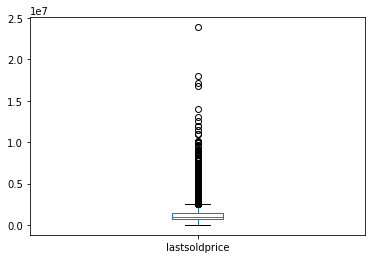

In [7]:
ax = df["lastsoldprice"].plot.box()

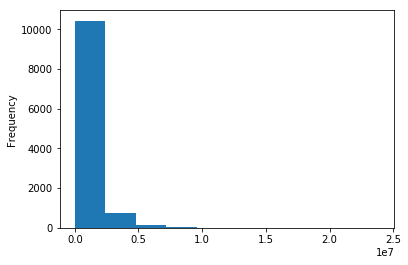

In [8]:
ax = df["lastsoldprice"].plot.hist()

# Predictive variable identification

In [9]:
x_selected = []
x_selected

[]

### var adress

In [10]:
df = df.drop("address", axis=1)
df.rename(columns={"z_address":"address"}, inplace=True)

### var info

In [11]:
df["info"].head(1)

0     San FranciscoSales price: 1300000Sales date: ...
Name: info, dtype: object

In [12]:
df["city"] = df["info"].astype(str).apply(lambda x: x[:14])
df["city"].value_counts()

 San Francisco    11330
Name: city, dtype: int64

In [13]:
df["Lotsize"] = df["info"].str.split('Lot size: ').str.get(1)
df["Lotsize"].median()

2996.0

In [14]:
df = df.drop("info", axis=1)

### var city

In [15]:
df["city"].head(1)

0     San Francisco
Name: city, dtype: object

In [16]:
df["city"].value_counts()

 San Francisco    11330
Name: city, dtype: int64

### var Lotsize

In [17]:
df["Lotsize"].head(1)

0    43557
Name: Lotsize, dtype: object

In [18]:
df["Lotsize"] = df["Lotsize"].astype("int64")

In [19]:
df["Lotsize"].min(), df["Lotsize"].max(), df["Lotsize"].mean(), df["Lotsize"].median()

(0, 70999999, 20885.24580759047, 2996.0)

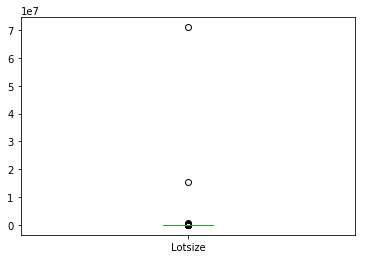

In [20]:
ax = df["Lotsize"].plot.box()

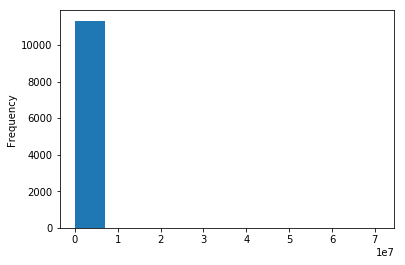

In [21]:
ax = df["Lotsize"].plot.hist()

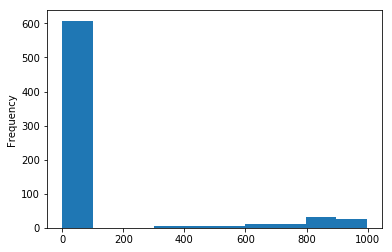

In [22]:
ax = df["Lotsize"][df["Lotsize"]<1000].plot.hist()

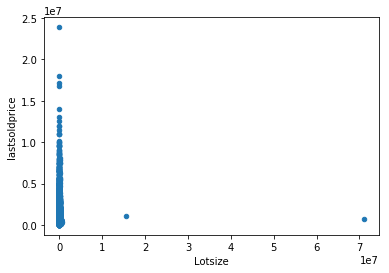

In [23]:
df.plot.scatter("Lotsize", "lastsoldprice")

*most values of lot size are 0 - so not taken into account


### var bathrooms

In [24]:
df["bathrooms"].head(1)

0    2.0
Name: bathrooms, dtype: float64

In [25]:
df["bathrooms"].value_counts()

2.00     4161
1.00     3903
3.00     1160
2.50      527
1.50      437
4.00      362
3.50      326
5.00      131
4.50      109
6.00       49
5.50       30
1.25       23
2.25       22
7.00       13
6.50       11
1.75        8
7.50        7
3.75        6
8.00        6
2.75        6
1.30        4
9.00        4
2.30        3
3.25        3
1.10        2
14.00       2
2.20        2
12.00       1
5.25        1
5.75        1
5.10        1
3.10        1
3.30        1
2.10        1
0.50        1
13.50       1
8.50        1
1.80        1
12.50       1
4.40        1
Name: bathrooms, dtype: int64

In [26]:
df["bathrooms"].min(), df["bathrooms"].max(), df["bathrooms"].mean(), df["bathrooms"].median()

(0.5, 14.0, 1.9802294792586055, 2.0)

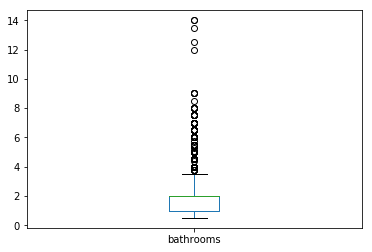

In [27]:
ax = df["bathrooms"].plot.box()

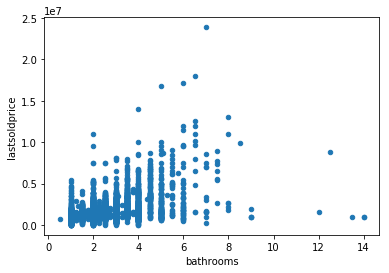

In [28]:
df.plot.scatter("bathrooms", "lastsoldprice")

In [29]:
import scipy.stats as scs
scs.pearsonr(df["lastsoldprice"],df["bathrooms"]), scs.spearmanr(df["lastsoldprice"],df["bathrooms"])

((0.536879544696509, 0.0),
 SpearmanrResult(correlation=0.5247829236878002, pvalue=0.0))

In [30]:
x_selected += ["bathrooms"]
x_selected

['bathrooms']

### var bedrooms

In [31]:
df["bedrooms"].head(1)

0    2.0
Name: bedrooms, dtype: float64

In [32]:
df["bedrooms"].value_counts()

2.0     4029
3.0     3288
1.0     1701
4.0     1455
5.0      423
6.0      173
0.0      138
7.0       54
9.0       28
8.0       27
10.0       5
16.0       3
12.0       2
11.0       1
20.0       1
14.0       1
13.0       1
Name: bedrooms, dtype: int64

In [33]:
df["bedrooms"].min(), df["bedrooms"].max(), df["bedrooms"].mean(), df["bedrooms"].median()

(0.0, 20.0, 2.614474845542807, 2.0)

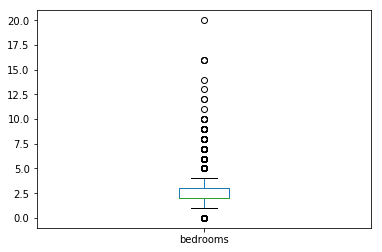

In [34]:
ax = df["bedrooms"].plot.box()

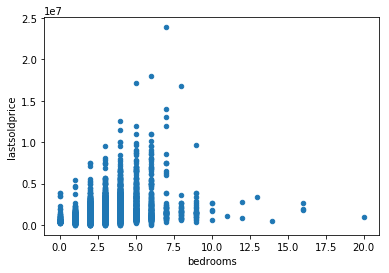

In [35]:
df.plot.scatter("bedrooms", "lastsoldprice")

In [36]:
import scipy.stats as scs
scs.pearsonr(df["lastsoldprice"],df["bedrooms"]), scs.spearmanr(df["lastsoldprice"],df["bedrooms"])

((0.3954783572030122, 0.0),
 SpearmanrResult(correlation=0.4477613654511635, pvalue=0.0))

In [37]:
x_selected += ["bedrooms"]
x_selected

['bathrooms', 'bedrooms']

### var finishedsqft

In [38]:
df["finishedsqft"].head(1)

0    1043.0
Name: finishedsqft, dtype: float64

In [39]:
df["finishedsqft"].min(), df["finishedsqft"].max(), df["finishedsqft"].mean(), df["finishedsqft"].median()

(1.0, 27275.0, 1585.4209179170343, 1362.0)

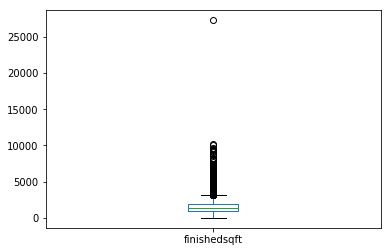

In [40]:
ax = df["finishedsqft"].plot.box()

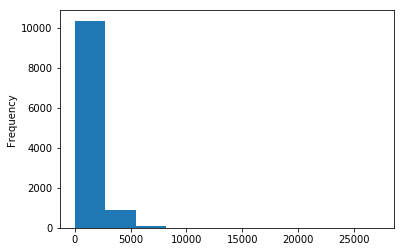

In [41]:
ax = df["finishedsqft"].plot.hist()

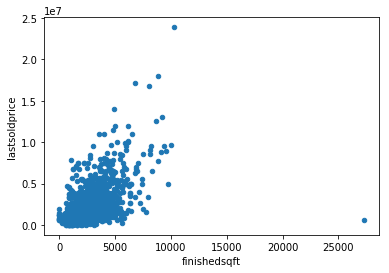

In [42]:
df.plot.scatter("finishedsqft", "lastsoldprice")

In [43]:
import scipy.stats as scs
scs.pearsonr(df["lastsoldprice"],df["finishedsqft"]), scs.spearmanr(df["lastsoldprice"],df["finishedsqft"])

((0.6472076824865315, 0.0),
 SpearmanrResult(correlation=0.6339773337924154, pvalue=0.0))

In [44]:
x_selected += ["finishedsqft"]
x_selected

['bathrooms', 'bedrooms', 'finishedsqft']

### var lastsolddate

In [45]:
df["lastsolddate"].head(1)

0    02/17/2016
Name: lastsolddate, dtype: object

In [46]:
df["lastsoldyear"] = df["lastsolddate"].astype(str).apply(lambda x: x[6:])
df["lastsoldyear"] = df["lastsoldyear"].astype("int64")
df["lastsoldyear"].value_counts()

2014    3342
2015    3296
2013    2744
2012    1336
2016     455
2011      99
2007       7
2006       7
2003       7
2009       7
2004       5
2008       4
1996       3
1997       3
2010       3
2005       2
2000       2
2002       2
1972       1
1970       1
1979       1
1988       1
1998       1
1992       1
Name: lastsoldyear, dtype: int64

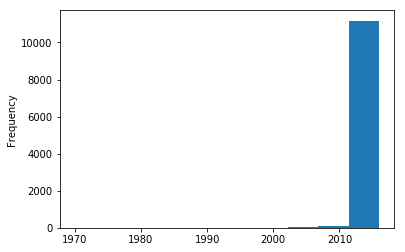

In [47]:
ax = df["lastsoldyear"].plot.hist()

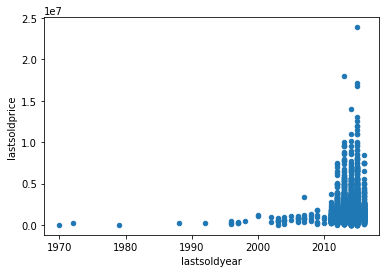

In [48]:
df.plot.scatter("lastsoldyear", "lastsoldprice")

In [49]:
import scipy.stats as scs
scs.pearsonr(df["lastsoldprice"],df["lastsoldyear"]), scs.spearmanr(df["lastsoldprice"],df["lastsoldyear"])

((0.14813445514640686, 1.3276572892021382e-56),
 SpearmanrResult(correlation=0.2624538074464083, pvalue=7.907312911116537e-178))

In [50]:
x_selected += ["lastsoldyear"]
x_selected

['bathrooms', 'bedrooms', 'finishedsqft', 'lastsoldyear']

### var neighborhood

In [51]:
df["neighborhood"].head(1) 

0    South of Market
Name: neighborhood, dtype: object

In [52]:
df["neighborhood"].value_counts()

Mission                                     540
Bernal Heights                              525
South of Market                             524
South Beach                                 461
Pacific Heights                             439
Noe Valley                                  389
Bayview                                     354
Eureka Valley - Dolores Heights - Castro    340
Potrero Hill                                312
Hayes Valley                                262
Excelsior                                   247
Van Ness - Civic Center                     244
Parkside                                    239
Outer Richmond                              231
Central Sunset                              229
Central Richmond                            227
Outer Parkside                              226
Lower Pacific Heights                       215
Glen Park                                   206
Marina                                      205
Russian Hill                            

*ziet er niet zo bruikbaar uit. Voor nu eruit gelaten

### var usecode

In [53]:
df["usecode"].head(1) 

0    Condominium
Name: usecode, dtype: object

In [54]:
df["usecode"].value_counts()

SingleFamily        5803
Condominium         4802
MultiFamily2To4      486
Duplex               146
Townhouse             66
Miscellaneous         17
Apartment              3
Cooperative            3
MultiFamily5Plus       2
Mobile                 2
Name: usecode, dtype: int64

In [55]:
df["usecode_new"] = df["usecode"]
df["usecode_new"][df["usecode"]== "Miscellaneous"] = "Other"
df["usecode_new"][df["usecode"]== "Apartment"] = "Other"
df["usecode_new"][df["usecode"]== "Cooperative"] = "Other"
df["usecode_new"][df["usecode"]== "MultiFamily5Plus"] = "Other"
df["usecode_new"][df["usecode"]== "Mobile"] = "Other"

C:\Users\kimte\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\kimte\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\kimte\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\kimte\Anaconda3\lib\

In [56]:
pd.crosstab(df["usecode"],df["usecode_new"])

usecode_new,Condominium,Duplex,MultiFamily2To4,Other,SingleFamily,Townhouse
usecode,,,,,,
Apartment,0,0,0,3,0,0
Condominium,4802,0,0,0,0,0
Cooperative,0,0,0,3,0,0
Duplex,0,146,0,0,0,0
Miscellaneous,0,0,0,17,0,0
Mobile,0,0,0,2,0,0
MultiFamily2To4,0,0,486,0,0,0
MultiFamily5Plus,0,0,0,2,0,0
SingleFamily,0,0,0,0,5803,0


In [57]:
df.groupby("usecode_new")["lastsoldprice"].median()

usecode_new
Condominium         925000.0
Duplex             1208500.0
MultiFamily2To4    1200000.0
Other              1330000.0
SingleFamily       1045000.0
Townhouse           815000.0
Name: lastsoldprice, dtype: float64

In [58]:
import scipy.stats as scs
scs.ttest_rel(df["usecode"].astype('category').cat.codes,df["lastsoldprice"])

Ttest_relResult(statistic=-129.10266870617158, pvalue=0.0)

In [59]:
import scipy.stats as scs
scs.ttest_rel(df["usecode_new"].astype('category').cat.codes,df["lastsoldprice"])

Ttest_relResult(statistic=-129.10291732354167, pvalue=0.0)

In [60]:
df = pd.concat([df, pd.get_dummies(df["usecode_new"], prefix="usecode_new", prefix_sep="_")], axis=1)

In [61]:
x_selected += pd.get_dummies(df["usecode_new"], prefix="usecode_new", prefix_sep="_").columns.values.tolist()
x_selected

['bathrooms',
 'bedrooms',
 'finishedsqft',
 'lastsoldyear',
 'usecode_new_Condominium',
 'usecode_new_Duplex',
 'usecode_new_MultiFamily2To4',
 'usecode_new_Other',
 'usecode_new_SingleFamily',
 'usecode_new_Townhouse']

### var yearbuilt

In [62]:
df["yearbuilt"].head(1) 

0    2007.0
Name: yearbuilt, dtype: float64

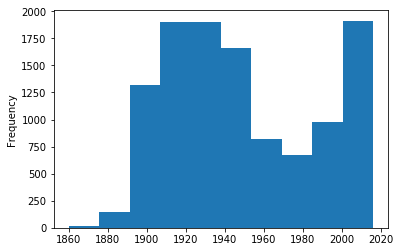

In [63]:
ax = df["yearbuilt"].plot.hist()

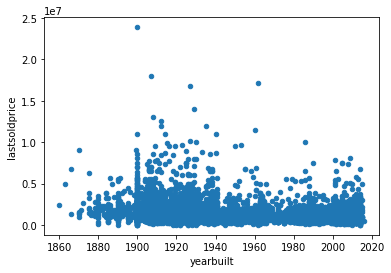

In [64]:
df.plot.scatter("yearbuilt", "lastsoldprice")

In [65]:
import scipy.stats as scs
scs.pearsonr(df["lastsoldprice"],df["yearbuilt"]), scs.spearmanr(df["lastsoldprice"],df["yearbuilt"])

((-0.18905507574578126, 1.1702114290582727e-91),
 SpearmanrResult(correlation=-0.2530115430677141, pvalue=5.477208602632849e-165))

In [66]:
x_selected += ["yearbuilt"]
x_selected

['bathrooms',
 'bedrooms',
 'finishedsqft',
 'lastsoldyear',
 'usecode_new_Condominium',
 'usecode_new_Duplex',
 'usecode_new_MultiFamily2To4',
 'usecode_new_Other',
 'usecode_new_SingleFamily',
 'usecode_new_Townhouse',
 'yearbuilt']

### var zindexvalue

In [67]:
df["zindexvalue"].head(5) 

0      975,700
1      975,700
2    1,277,600
3    1,277,600
4    1,248,000
Name: zindexvalue, dtype: object

In [68]:
df["zindexvalue"] = df["zindexvalue"].str.replace(",","")
df["zindexvalue"] = df["zindexvalue"].astype("int64")

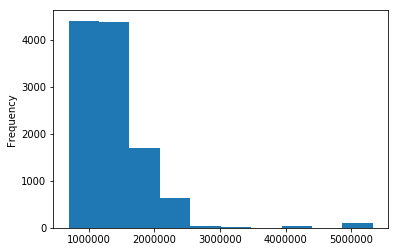

In [69]:
ax = df["zindexvalue"].plot.hist()

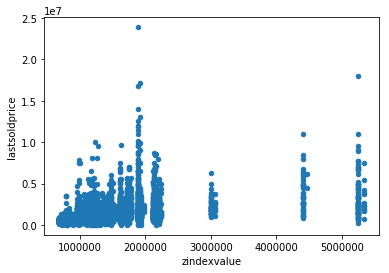

In [70]:
df.plot.scatter("zindexvalue", "lastsoldprice")

In [71]:
import scipy.stats as scs
scs.pearsonr(df["lastsoldprice"],df["zindexvalue"]), scs.spearmanr(df["lastsoldprice"],df["zindexvalue"])

((0.4604293667233893, 0.0),
 SpearmanrResult(correlation=0.586839365631208, pvalue=0.0))

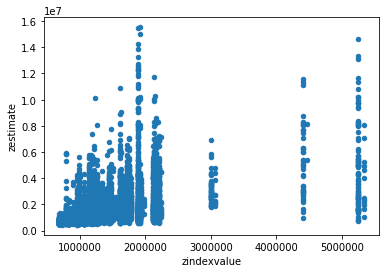

In [72]:
df.plot.scatter("zindexvalue", "zestimate")

In [73]:
x_selected += ["zindexvalue"]
x_selected

['bathrooms',
 'bedrooms',
 'finishedsqft',
 'lastsoldyear',
 'usecode_new_Condominium',
 'usecode_new_Duplex',
 'usecode_new_MultiFamily2To4',
 'usecode_new_Other',
 'usecode_new_SingleFamily',
 'usecode_new_Townhouse',
 'yearbuilt',
 'zindexvalue']

### var zipcode

In [74]:
df["zipcode"].head(5) 

0    94103.0
1    94107.0
2    94107.0
3    94107.0
4    94110.0
Name: zipcode, dtype: float64

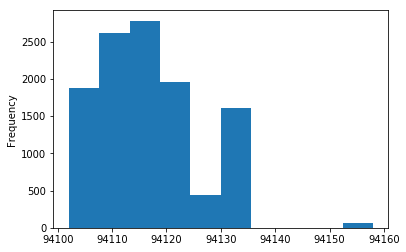

In [75]:
ax = df["zipcode"].plot.hist()

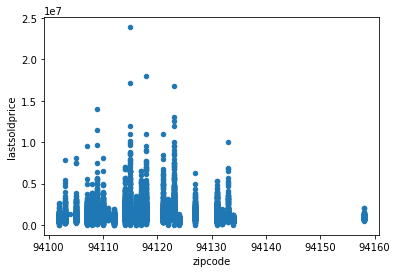

In [76]:
df.plot.scatter("zipcode", "lastsoldprice")

*niet meegenomen want veel groepen en geen duidelijke correlatie (zou ook raar zijn met postcode!) - neibourghood dat interessanter

### var zpid

In [77]:
df["zpid"].head(5) 

0    83152781.0
1    69819817.0
2    64972847.0
3    15149489.0
4    15161978.0
Name: zpid, dtype: float64

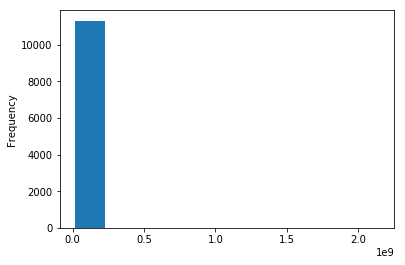

In [78]:
ax = df["zpid"].plot.hist()

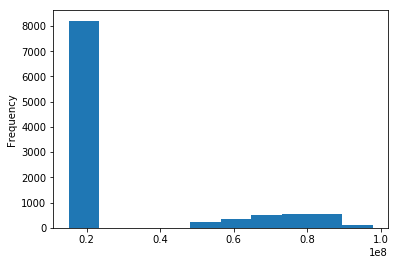

In [79]:
ax = df["zpid"][df["zpid"]<100000000].plot.hist()

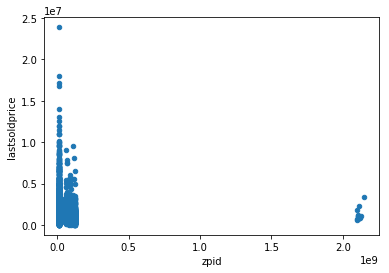

In [80]:
df.plot.scatter("zpid", "lastsoldprice")

In [81]:
df["zpid_cat"] = 0
df["zpid_cat"][df["zpid"]>100000000] = 1
df["zpid_cat"].value_counts()

C:\Users\kimte\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    10513
1      817
Name: zpid_cat, dtype: int64

In [82]:
df.groupby("zpid_cat")["lastsoldprice"].median()

zpid_cat
0    998000.0
1    953000.0
Name: lastsoldprice, dtype: float64

In [83]:
import scipy.stats as scs
scs.ttest_rel(df["zpid_cat"].astype('category').cat.codes,df["lastsoldprice"])

Ttest_relResult(statistic=-129.1030969346675, pvalue=0.0)

In [84]:
x_selected += ["zpid_cat"]
x_selected

['bathrooms',
 'bedrooms',
 'finishedsqft',
 'lastsoldyear',
 'usecode_new_Condominium',
 'usecode_new_Duplex',
 'usecode_new_MultiFamily2To4',
 'usecode_new_Other',
 'usecode_new_SingleFamily',
 'usecode_new_Townhouse',
 'yearbuilt',
 'zindexvalue',
 'zpid_cat']

# Model bouwen

In [85]:
x_selected
x=df[x_selected]
y=df["lastsoldprice"]
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 13 columns):
bathrooms                      11330 non-null float64
bedrooms                       11330 non-null float64
finishedsqft                   11330 non-null float64
lastsoldyear                   11330 non-null int64
usecode_new_Condominium        11330 non-null uint8
usecode_new_Duplex             11330 non-null uint8
usecode_new_MultiFamily2To4    11330 non-null uint8
usecode_new_Other              11330 non-null uint8
usecode_new_SingleFamily       11330 non-null uint8
usecode_new_Townhouse          11330 non-null uint8
yearbuilt                      11330 non-null float64
zindexvalue                    11330 non-null int64
zpid_cat                       11330 non-null int64
dtypes: float64(4), int64(3), uint8(6)
memory usage: 686.1 KB


### Full model (own feature selection)

In [86]:
import statsmodels.api as sm
linear_model=sm.OLS(y,x)
result=linear_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          lastsoldprice   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     1115.
Date:                Wed, 01 Aug 2018   Prob (F-statistic):               0.00
Time:                        11:13:34   Log-Likelihood:            -1.6865e+05
No. Observations:               11330   AIC:                         3.373e+05
Df Residuals:                   11317   BIC:                         3.374e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
bathrooms         

### Automated feature selection

In [87]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

rfe = RFE(lr, 13)
rfe = rfe.fit(x, y)
print(rfe.support_)
print(rfe.ranking_)
list_features = np.atleast_1d(rfe.support_)
x_features = x.loc[:,list_features]

[ True  True  True  True  True  True  True  True  True  True  True  True
  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1]


In [88]:
x_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 13 columns):
bathrooms                      11330 non-null float64
bedrooms                       11330 non-null float64
finishedsqft                   11330 non-null float64
lastsoldyear                   11330 non-null int64
usecode_new_Condominium        11330 non-null uint8
usecode_new_Duplex             11330 non-null uint8
usecode_new_MultiFamily2To4    11330 non-null uint8
usecode_new_Other              11330 non-null uint8
usecode_new_SingleFamily       11330 non-null uint8
usecode_new_Townhouse          11330 non-null uint8
yearbuilt                      11330 non-null float64
zindexvalue                    11330 non-null int64
zpid_cat                       11330 non-null int64
dtypes: float64(4), int64(3), uint8(6)
memory usage: 686.1 KB


### Final model (6 features selected)

In [89]:
import statsmodels.api as sm
linear_model=sm.OLS(y,x_features)
result=linear_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          lastsoldprice   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     1115.
Date:                Wed, 01 Aug 2018   Prob (F-statistic):               0.00
Time:                        11:13:34   Log-Likelihood:            -1.6865e+05
No. Observations:               11330   AIC:                         3.373e+05
Df Residuals:                   11317   BIC:                         3.374e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
bathrooms         

In [90]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_features, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LinearRegression
from sklearn import metrics
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Accuracy of final model

In [91]:
y_pred = model.predict(x_test)

C:\Users\kimte\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


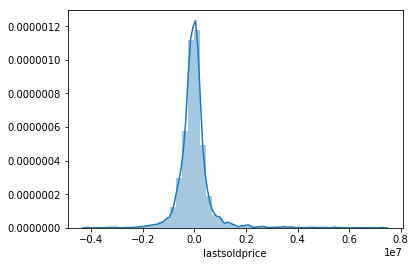

In [92]:
sb.distplot(y_test - y_pred)

In [93]:
model.score(x_features,y)

0.5408499659401903

In [94]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5439683011491925

# Voorspelling plakken in dataset

In [95]:
df["lastsoldprice_predicted"] = model.predict(x_features)

### predictions vergelijken met var lastsoldprice - model input (accuracy!)

C:\Users\kimte\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


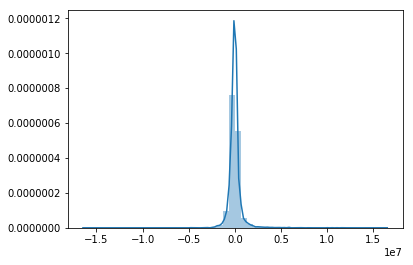

In [96]:
sb.distplot(df["lastsoldprice"] - df["lastsoldprice_predicted"])

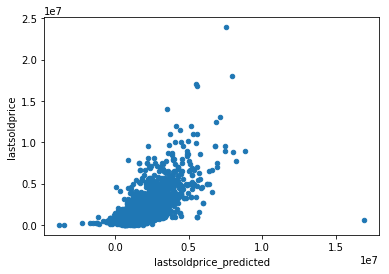

In [97]:
df.plot.scatter("lastsoldprice_predicted", "lastsoldprice")

In [98]:
import scipy.stats as scs
scs.pearsonr(df["lastsoldprice"],df["lastsoldprice_predicted"]), scs.spearmanr(df["lastsoldprice"],df["lastsoldprice_predicted"])

((0.7356401427743283, 0.0),
 SpearmanrResult(correlation=0.7708326549157885, pvalue=0.0))

### predictions vergelijken met var zestimate - door andere website voorspeld

In [99]:
df["zestimate"].head(1) 

0    1167508.0
Name: zestimate, dtype: float64

C:\Users\kimte\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


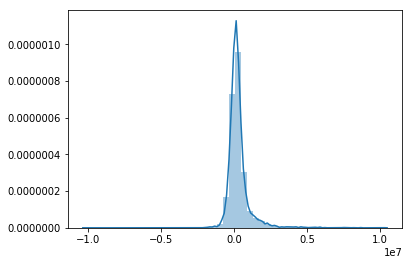

In [100]:
sb.distplot(df["zestimate"] - df["lastsoldprice_predicted"])

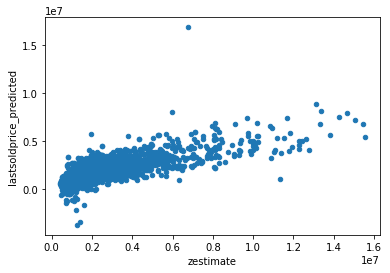

In [101]:
df.plot.scatter("zestimate", "lastsoldprice_predicted")

In [102]:
import scipy.stats as scs
scs.pearsonr(df["lastsoldprice_predicted"],df["zestimate"]), scs.spearmanr(df["lastsoldprice_predicted"],df["zestimate"])

((0.7924000023421014, 0.0),
 SpearmanrResult(correlation=0.776917672967635, pvalue=0.0))

https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html

geopanda folium ook mogelijkheid voor spatial analyses!

In [103]:
df["latitude"].head(1)

0    37.778705
Name: latitude, dtype: float64

In [104]:
df["latitude"].min(), df["latitude"].max()

(37.70817, 37.806083)

In [105]:
df["longitude"].head(1)

0   -122.412635
Name: longitude, dtype: float64

In [106]:
df["longitude"].min(), df["longitude"].max()

(-122.510726, -122.381201)

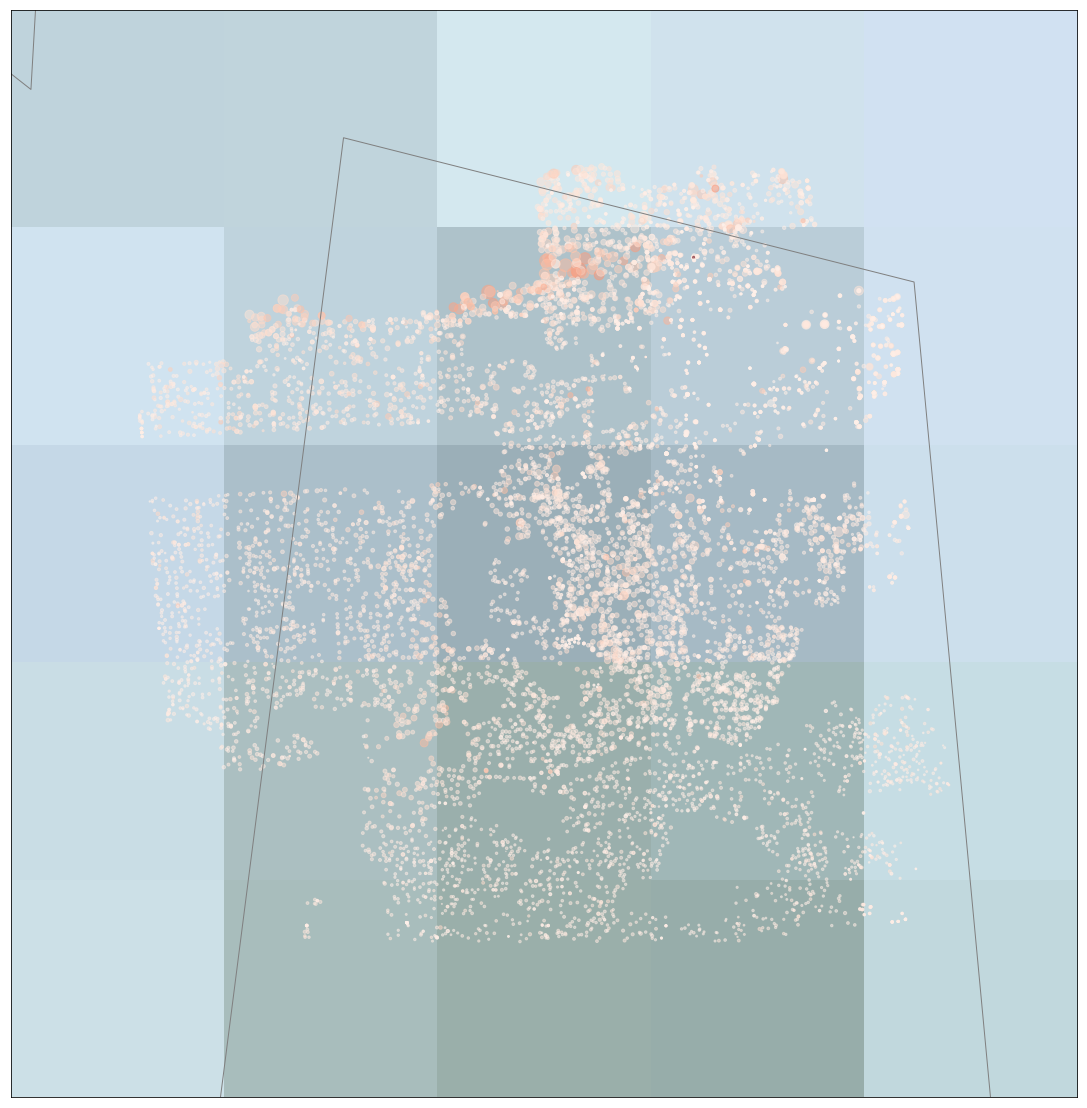

In [107]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
fig = plt.figure(figsize=(20, 20))
#m = Basemap(projection='lcc', resolution='l',lat_0=37, lon_0=-122,width=1E6, height=1.2E6, llcrnrlon=df["longitude"].min()-0.01, llcrnrlat=df["latitude"].min()-0.01, urcrnrlon=df["longitude"].max()+0.01, urcrnrlat=df["latitude"].max()+0.01)
m = Basemap(projection='lcc', resolution='l',lat_0=37, lon_0=-122,width=1E6, height=1.2E6, llcrnrlon=df["longitude"].min()-0.02, llcrnrlat=df["latitude"].min()-0.02, urcrnrlon=df["longitude"].max()+0.02, urcrnrlat=df["latitude"].max()+0.02)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')
m.scatter(df["longitude"].tolist(), df["latitude"].tolist(), latlon=True,c=(df["finishedsqft"]/100000).tolist(), s=(df["lastsoldprice"]/100000).tolist(),cmap='Reds', alpha=0.5)

http://basemaptutorial.readthedocs.io/en/latest/backgrounds.html

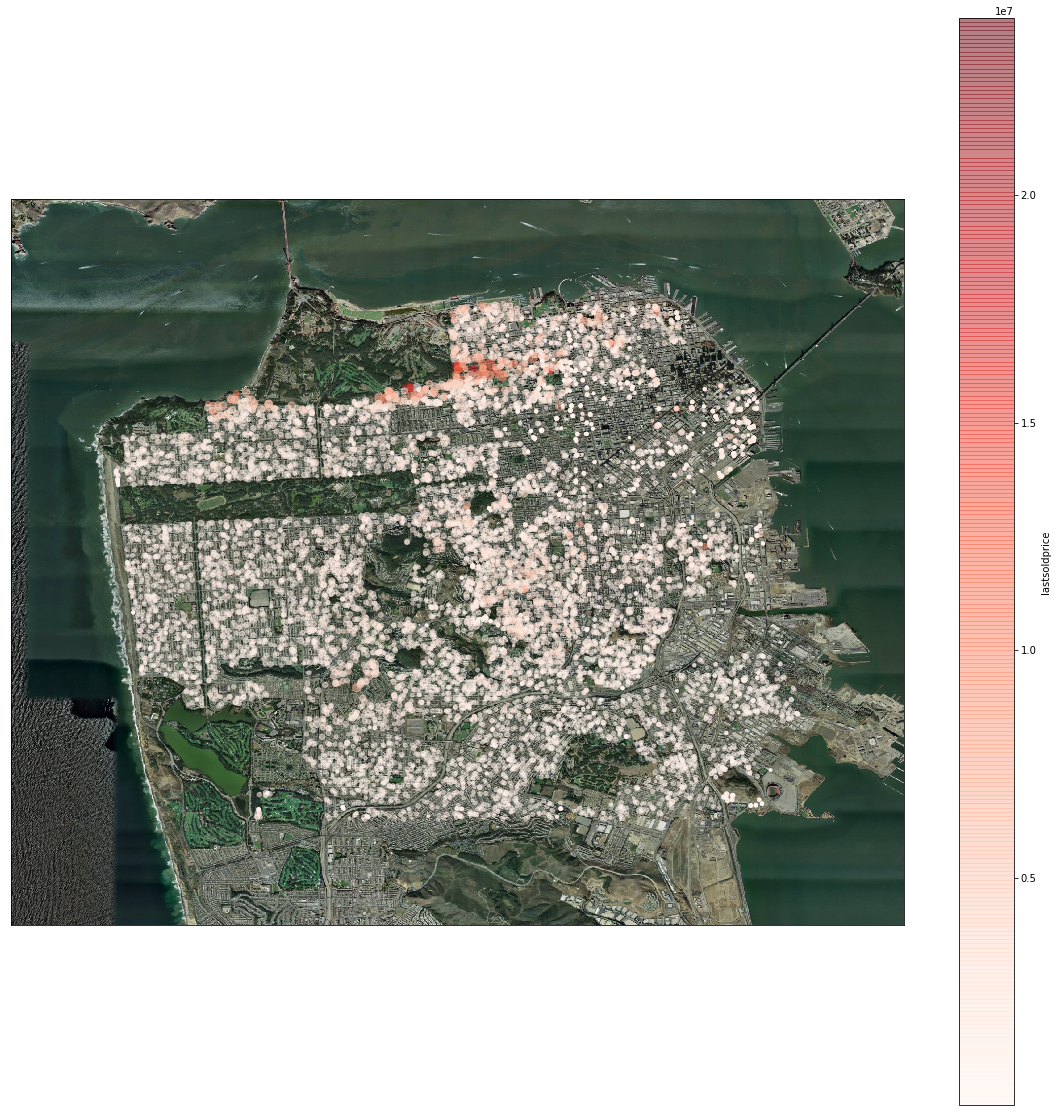

In [110]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
fig = plt.figure(figsize=(20, 20))
m = Basemap(projection='lcc', resolution=None,lat_0=37, lon_0=-122,width=1E6, height=1.2E6, llcrnrlon=df["longitude"].min()-0.02, llcrnrlat=df["latitude"].min()-0.02, urcrnrlon=df["longitude"].max()+0.02, urcrnrlat=df["latitude"].max()+0.02, epsg=4228)
m.arcgisimage(server='http://server.arcgisonline.com/ArcGIS', service='ESRI_Imagery_World_2D', xpixels=2000, ypixels=None, dpi=96, verbose=False)
m.scatter(df["longitude"].tolist(), df["latitude"].tolist(), latlon=True,c=df["lastsoldprice"].tolist(), s=(df["finishedsqft"]/100).tolist(),cmap='Reds', alpha=0.5)
plt.colorbar(label=r'lastsoldprice')
plt.clim(df["lastsoldprice"].min(), df["lastsoldprice"].max())

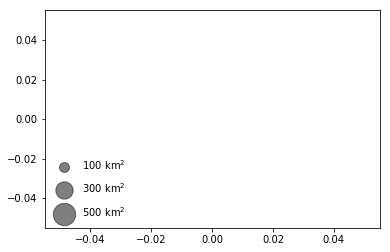

In [109]:
# make legend with dummy points - NOG NIET GEDAAN
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

http://python-visualization.github.io/folium/docs-v0.5.0/modules.html en https://blog.dominodatalab.com/creating-interactive-crime-maps-with-folium/

In [128]:
import folium
m = folium.Map(location=(37.76, -122.45), zoom_start=12.5)
display(m)

https://alysivji.github.io/getting-started-with-folium.html

In [203]:
import folium
from folium import plugins
m = folium.Map(location=(37.76, -122.45), zoom_start=12.5)
#for each in df[0:1000].iterrows():
    #folium.CircleMarker(location=(each[1]["latitude"],each[1]["longitude"]), color="#3db7e4", fill_color="#3db7e4", alpha=0.5).add_to(m)
matrix = np.array(df[['latitude', 'longitude']]).tolist()
matrix
m.add_child(plugins.HeatMap(matrix, radius=15))
display(m)


In [211]:
import folium
from folium import plugins

m = folium.Map(location=(37.76, -122.45), zoom_start=12)
#for each in df[0:1000].iterrows():
    #folium.CircleMarker(location=(each[1]["latitude"],each[1]["longitude"]), color="#3db7e4", fill_color="#3db7e4", alpha=0.5).add_to(m)
matrix = np.array(df[['latitude', 'longitude']][df["lastsoldprice"]<1000000]).tolist()
matrix
m.add_child(plugins.HeatMap(matrix, radius=15))

m1 = folium.Map(location=(37.76, -122.45), zoom_start=12)
#for each in df[0:1000].iterrows():
    #folium.CircleMarker(location=(each[1]["latitude"],each[1]["longitude"]), color="#3db7e4", fill_color="#3db7e4", alpha=0.5).add_to(m)
matrix = np.array(df[['latitude', 'longitude']][df["lastsoldprice"]>10000000]).tolist()
matrix
m1.add_child(plugins.HeatMap(matrix, radius=15))



display(m,m1)

In [236]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets



def f(below):
    m = folium.Map(location=(37.76, -122.45), zoom_start=12)
    matrix = np.array(df[['latitude', 'longitude']][df["lastsoldprice"]>below]).tolist()
    m.add_child(plugins.HeatMap(matrix, radius=15))
    return m


In [237]:
interact(f, below=widgets.IntSlider(min=0,max=df["lastsoldprice"].max(),step=10000,value=df["lastsoldprice"].median()));

interactive(children=(IntSlider(value=990000, description='below', max=23889000, step=10000), Output()), _dom_…